In [2]:
import boto3
import pandas as pd
import io
from datetime import datetime, timedelta

555 Taxter - US-NY-010523-1901/
565 Taxter - US-NY-010523-1900/
4WRO - US-NY-010604-2000/
660 WP - US-NY-010591-1900/

In [ ]:
past_activations = ['2022-06-29', '2023-02-28', '2023-05-25', '2023-06-29', '2023-07-27', '2023-09-06', '2023-09-07', '2024-01-17','2024-04-17'] 

# IESO_holiday only needs to be updated yearly, add dates for IESO holidays in the year. Information can be found on their website:
# https://ieso.ca/en/Sector-Participants/Calendars/Market-Calendars/2023-Physical-and-Financial-Market-Holiday-Schedule
NYISO_holidays = []

In [15]:
def get_30days(site_id, event_day):
    session = boto3.Session()
    s3_client = session.client('s3')
    bucket_name = 'rtac-ddr'

    sub_folder_prefix = f'processed/{site_id}/1s/daily/'

    try:
        # Convert event_day to datetime object
        event_day_date = datetime.strptime(event_day, '%Y-%m-%d')
        start_date = event_day_date - timedelta(days=30)

        # List objects in the specified sub-folder
        response = s3_client.list_objects_v2(Bucket=bucket_name, Prefix=sub_folder_prefix)

        data_frames = []

        if 'Contents' in response:
            for obj in response['Contents']:
                # Extract the file name from the full key path
                file_name = obj['Key'].split('/')[-1]

                # Extract the date from the filename (assuming format: US-NY-010523-1900-YYYYMMDD-YYYYMMDD-Aggregated.csv)
                parts = file_name.split('-')
                if len(parts) >= 5:
                    file_date_str = parts[4]
                    try:
                        file_date = datetime.strptime(file_date_str, '%Y%m%d')
                        if start_date <= file_date <= event_day_date:
                            file_obj = s3_client.get_object(Bucket=bucket_name, Key=obj['Key'])
                            file_content = file_obj['Body'].read()
                            data_frame = pd.read_csv(io.BytesIO(file_content))
                            data_frames.append(data_frame)
                    except ValueError:
                        print(f"Skipping file with invalid date format: {obj['Key']}")
        else:
            print(f"The sub-folder {sub_folder_prefix} in bucket {bucket_name} is empty.")

        # Aggregate all data frames into a single data frame
        if data_frames:
            combined_df = pd.concat(data_frames, ignore_index=True)
            return combined_df
        else:
            print("No files found in the specified date range.")
            return pd.DataFrame()
    except s3_client.exceptions.NoSuchBucket:
        print(f"The bucket {bucket_name} does not exist.")
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()
    
def cbl_basis_calculator(thirtydays_df):
    # get initial seed value for average event period usage level, the one hour with the highest demand (highest net load)
    initial_seedvalue = thirtydays_df['Net Load'].max()
    
    # Start the eligibility-elimination loop
    # eliminate any event days or days prior to event days, and low usage days
    # start with weekday 2 days prior
    return Dataframe
    

# Example usage:
# df = get_30days('site123', '2023-05-25')

patu = get_30days('US-NY-010591-1900', '2024-04-19')
patu

,generateTime,OPR_DT,OPR_HR,Net Load,ESS Output,Gross Load,SoC,SoH,LBMP ($/kWh)
0,2024-03-20 00:00,2024-03-20,0,493.172277,-322.905701,170.266576,0.0,0.0,0.02353
1,2024-03-20 00:15,2024-03-20,0,491.909951,-322.881911,169.028039,0.0,0.0,0.02353
2,2024-03-20 00:30,2024-03-20,0,490.181934,-322.878791,167.303142,0.0,0.0,0.02353
3,2024-03-20 00:45,2024-03-20,0,488.830938,-322.877283,165.953655,0.0,0.0,0.02353
4,2024-03-20 01:00,2024-03-20,1,491.280094,-321.018109,170.261985,0.0,0.0,0.02203
...,...,...,...,...,...,...,...,...,...
2971,2024-04-19 22:45,2024-04-19,22,158.480626,-0.100000,158.380626,0.0,0.0,0.02570
2972,2024-04-19 23:00,2024-04-19,23,160.145106,-0.096575,160.048531,0.0,0.0,0.02221
2973,2024-04-19 23:15,2024-04-19,23,156.480732,-0.100000,156.380732,0.0,0.0,0.02221
2974,2024-04-19 23:30,2024-04-19,23,158.646735,-0.100000,158.546735,0.0,0.0,0.02221


In [ ]:
# one for weekday, one for weekend

# Inputs:
# site, event day, event start time (hour ending), event end time (hour ending)

# Dataframes:
# DF 1: 30 days data from event and before - hourly
# DF 2: CBL basis table - 5 days with highest average daily event period usages, for the hours of the event
# DF 3: CBL values: average of each hour of DF 2
# DF 4: adjustment hours values
# DF 5: adjusted CBLs table

# Steps:
 # access s3 to build DF 1
 # Input DF 1 into function that builds DF 2 & DF 3
 # Input DF 1 into function that builds DF 4
 # Input DF 3 & DF 4 into function to return DF 5


    

Weekday CBL

1. connect to s3 bucket
2. Calculate CBL basis
    a) event period load over last 30 days = cbl window
    b) iterate backwards to find the 10 eligible weekdays for basis calculation
    c) Take 5 days out of 10 with highest average usage for event period
    d) Average usage for each hour from those 5 days

Weekend CBL

1. connect to s3 bucket
2. 3 most recent weekend days = cbl window
3. 2 highest days, average for each hour of event period = cbl basis


Adjustment Factor

1. adjustment period is 2 hour preiod beginning 4 hours prior to start of event
2. Apply average day CBL process to adjusment window
3. divide by average CBL = adjustment factor

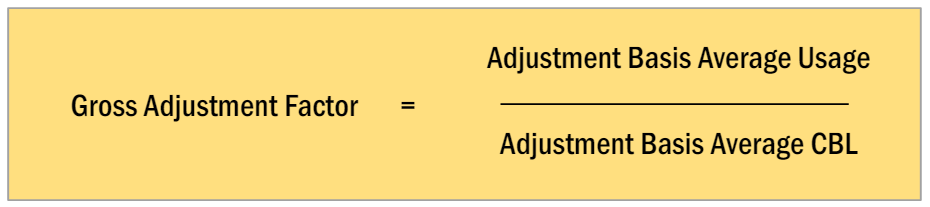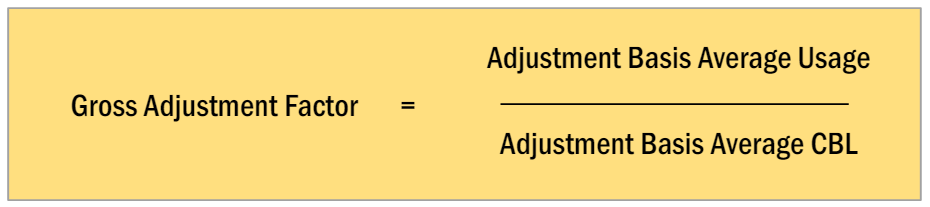